In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/user/1/Downloads/housing.csv/housing.csv')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [6]:
df.shape

(20640, 10)

In [7]:
df.dropna(inplace = True)
df.shape

(20433, 10)

In [8]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [9]:
df.columns = ['longitude', 'latitude', 'house_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'income',
       'house_value', 'ocean_proximity']

In [10]:
df.describe()

longitude      latitude     house_age   total_rooms  total_bedrooms  \
count  20433.000000  20433.000000  20433.000000  20433.000000    20433.000000   
mean    -119.570689     35.633221     28.633094   2636.504233      537.870553   
std        2.003578      2.136348     12.591805   2185.269567      421.385070   
min     -124.350000     32.540000      1.000000      2.000000        1.000000   
25%     -121.800000     33.930000     18.000000   1450.000000      296.000000   
50%     -118.490000     34.260000     29.000000   2127.000000      435.000000   
75%     -118.010000     37.720000     37.000000   3143.000000      647.000000   
max     -114.310000     41.950000     52.000000  39320.000000     6445.000000   

         population    households        income    house_value  
count  20433.000000  20433.000000  20433.000000   20433.000000  
mean    1424.946949    499.433465      3.871162  206864.413155  
std     1133.208490    382.299226      1.899291  115435.667099  
min        3.000000      1.000000      0.499900   14999.000000  
25%      787.000000    280.000000      2.563700  119500.000000  
50%     1166.000000    409.000000      3.536500  179700.000000  
75%     1722.000000    604.000000      4.744000  264700.000000  
max    35682.000000   6082.000000     15.000100  500001.000000

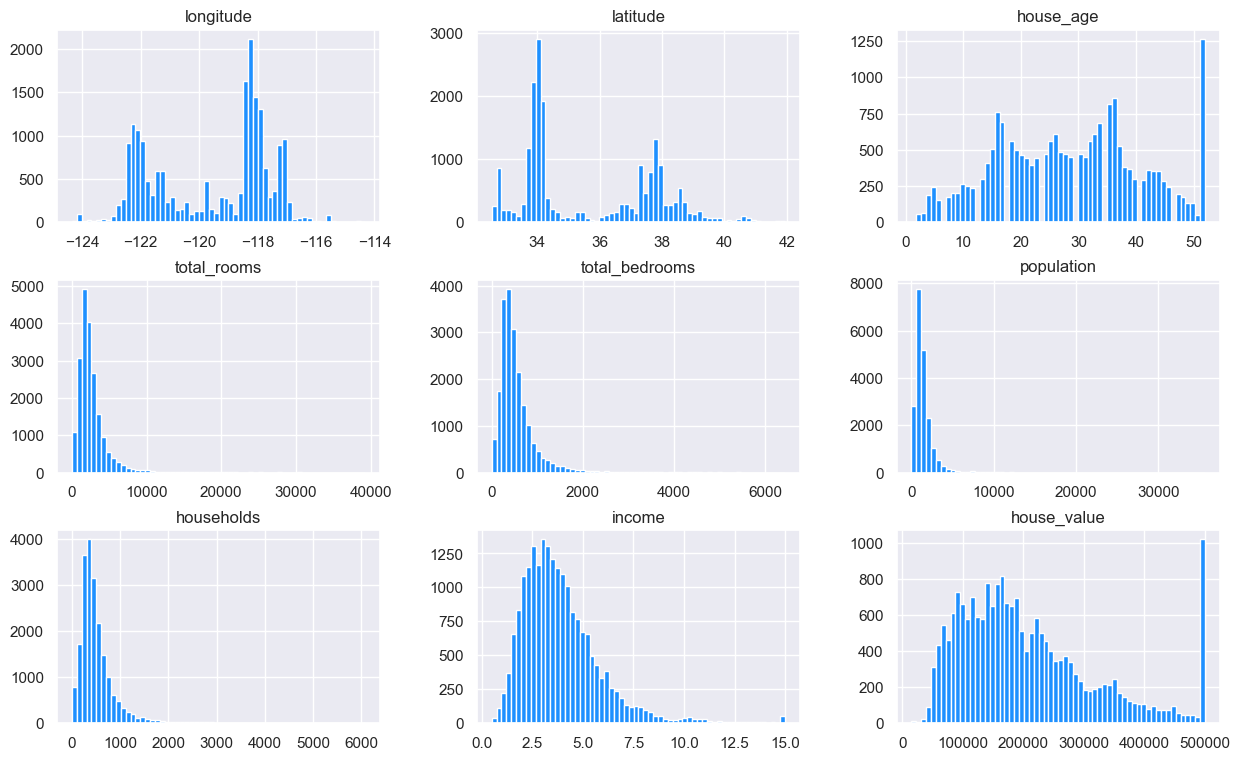

In [11]:
df.hist(bins=60, figsize=(15,9),color='dodgerblue');plt.show()

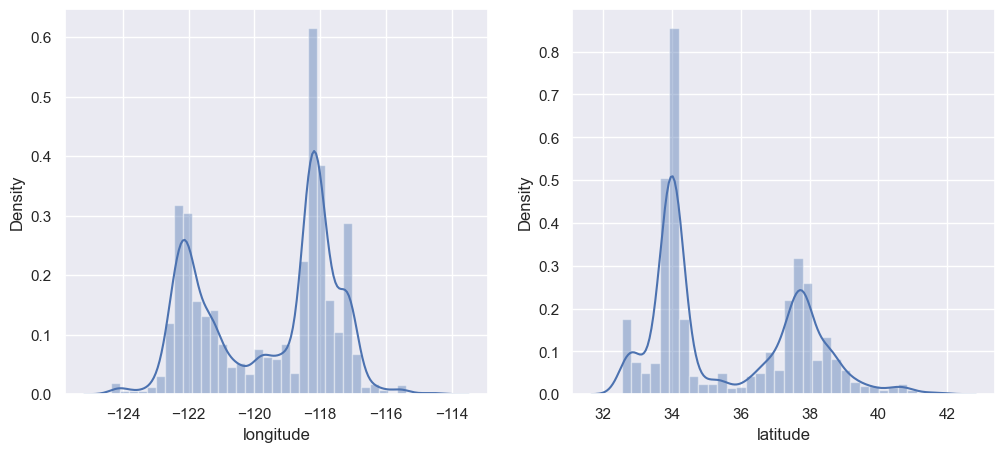

In [12]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(df['longitude'])
plt.subplot(1,2,2)
sns.distplot(df['latitude'])
plt.show()

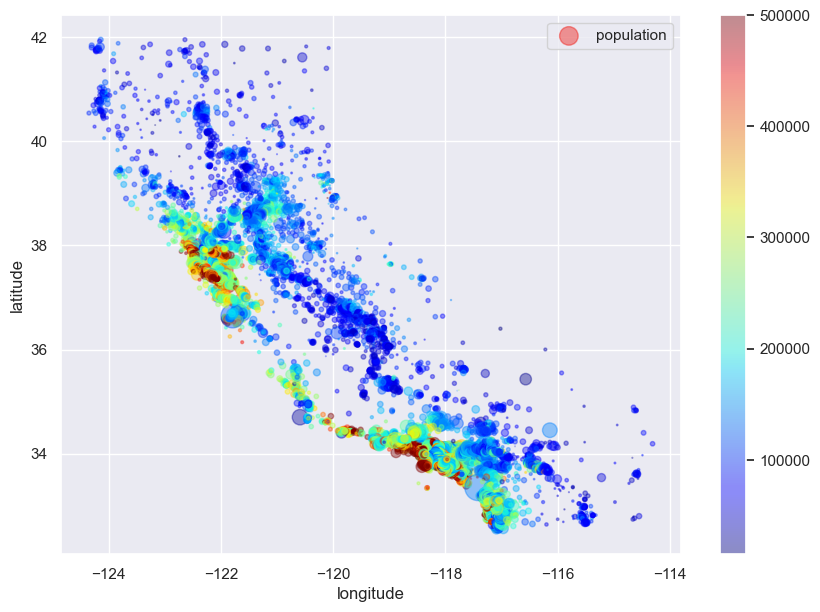

In [13]:
df.plot(kind = 'scatter', x ='longitude', y = 'latitude', alpha = 0.4,
              s = df["population"]/100, label = "population",figsize = (10,7),
             c = df['house_value'], cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend()
plt.show()

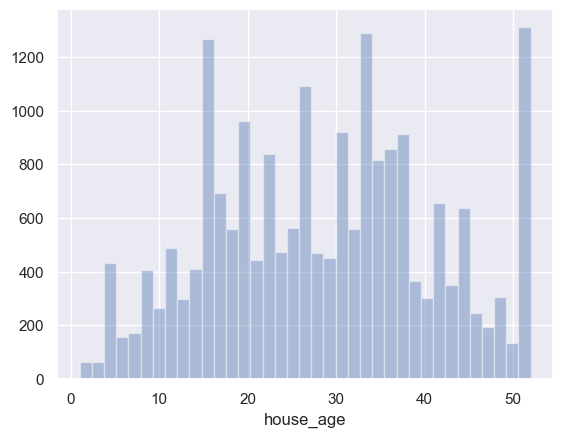

In [14]:
sns.distplot(df['house_age'],kde = False)
plt.show()

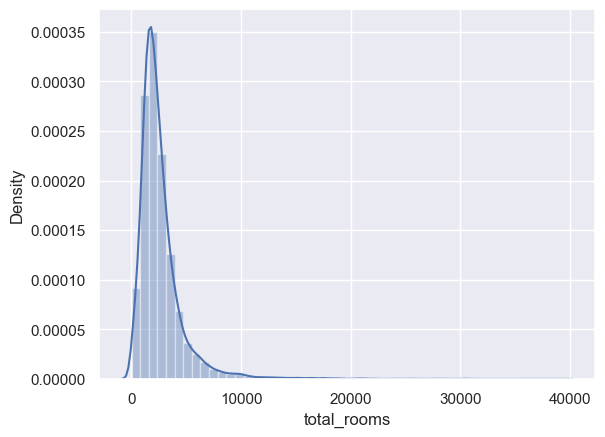

count    20433.000000
mean      2636.504233
std       2185.269567
min          2.000000
25%       1450.000000
50%       2127.000000
75%       3143.000000
max      39320.000000
Name: total_rooms, dtype: float64


In [15]:
sns.distplot(df['total_rooms'])
plt.show()
print(df['total_rooms'].describe())

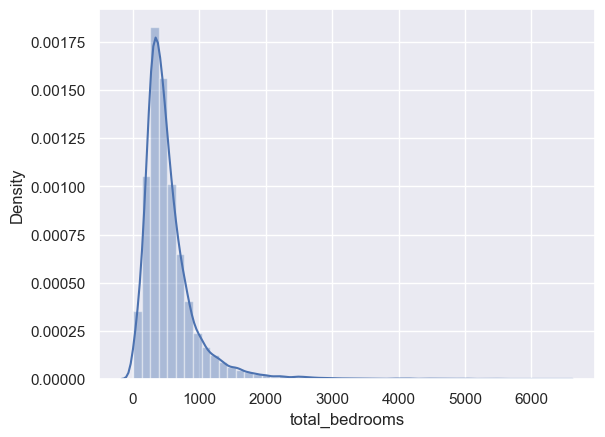

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


In [16]:
sns.distplot(df['total_bedrooms'])
plt.show()
print(df['total_bedrooms'].describe())

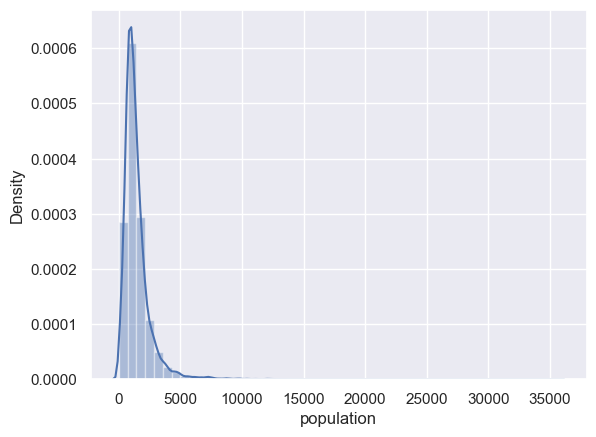

count    20433.000000
mean      1424.946949
std       1133.208490
min          3.000000
25%        787.000000
50%       1166.000000
75%       1722.000000
max      35682.000000
Name: population, dtype: float64


In [17]:
sns.distplot(df['population'])
plt.show()
print(df['population'].describe())

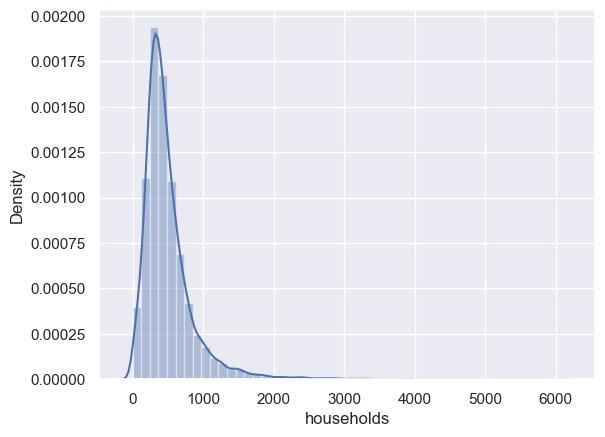

count    20433.000000
mean       499.433465
std        382.299226
min          1.000000
25%        280.000000
50%        409.000000
75%        604.000000
max       6082.000000
Name: households, dtype: float64


In [18]:
sns.distplot(df['households'])
plt.show()
print(df['households'].describe())

In [19]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [20]:
df = df[df['ocean_proximity'] != 'ISLAND']

In [21]:
df.shape

(20428, 10)

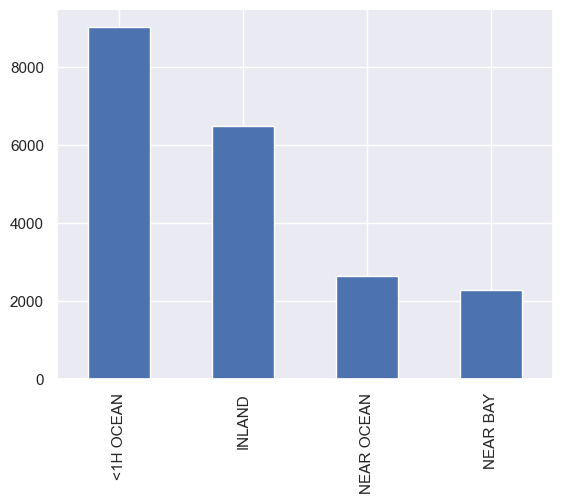

In [22]:
df['ocean_proximity'].value_counts().plot.bar()
plt.show()

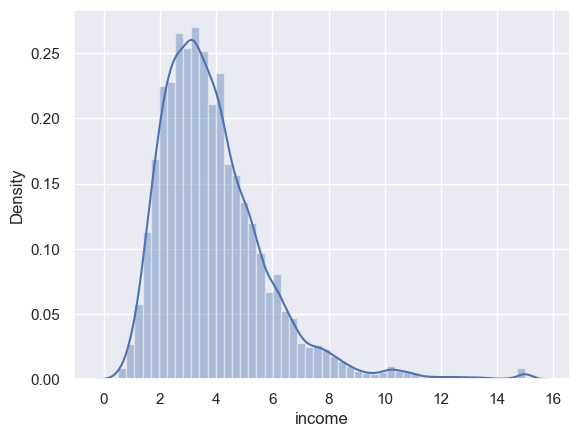

count    20428.000000
mean         3.871437
std          1.899432
min          0.499900
25%          2.563400
50%          3.537500
75%          4.744075
max         15.000100
Name: income, dtype: float64


In [23]:
sns.distplot(df['income'])
plt.show()
print(df['income'].describe())

In [24]:
df['house_value'].describe()

count     20428.000000
mean     206821.928432
std      115412.337452
min       14999.000000
25%      119475.000000
50%      179700.000000
75%      264700.000000
max      500001.000000
Name: house_value, dtype: float64

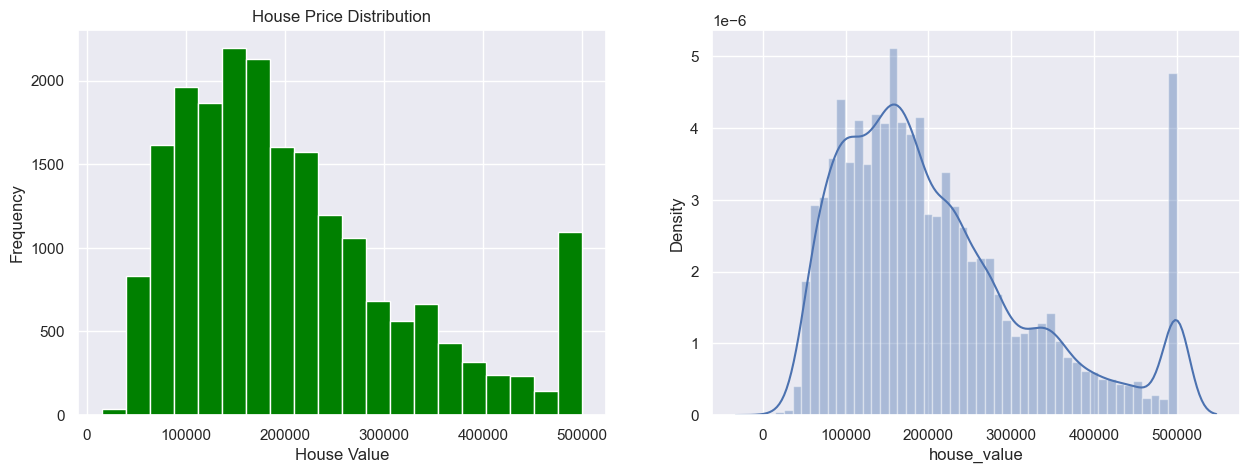

In [25]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.hist(df['house_value'],bins = 20,color = 'green')
plt.xlabel('House Value')
plt.ylabel('Frequency')
plt.title('House Price Distribution')
plt.subplot(1,2,2)
sns.distplot(df['house_value'])
plt.show()

### Correlation Analysis

In [26]:
df.corr()

longitude  latitude  house_age  total_rooms  total_bedrooms  \
longitude        1.000000 -0.924628  -0.109556     0.045555        0.069653   
latitude        -0.924628  1.000000   0.012192    -0.036799       -0.067066   
house_age       -0.109556  0.012192   1.000000    -0.360634       -0.320486   
total_rooms      0.045555 -0.036799  -0.360634     1.000000        0.930382   
total_bedrooms   0.069653 -0.067066  -0.320486     0.930382        1.000000   
population       0.100380 -0.109193  -0.295715     0.857273        0.877758   
households       0.056604 -0.071939  -0.302714     0.918987        0.979740   
income          -0.015464 -0.079796  -0.118191     0.197822       -0.007767   
house_value     -0.045642 -0.144312   0.106077     0.133516        0.049792   

                population  households    income  house_value  
longitude         0.100380    0.056604 -0.015464    -0.045642  
latitude         -0.109193   -0.071939 -0.079796    -0.144312  
house_age        -0.295715   -0.302714 -0.118191     0.106077  
total_rooms       0.857273    0.918987  0.197822     0.133516  
total_bedrooms    0.877758    0.979740 -0.007767     0.049792  
population        1.000000    0.907177  0.004989    -0.025069  
households        0.907177    1.000000  0.013350     0.065122  
income            0.004989    0.013350  1.000000     0.688848  
house_value      -0.025069    0.065122  0.688848     1.000000

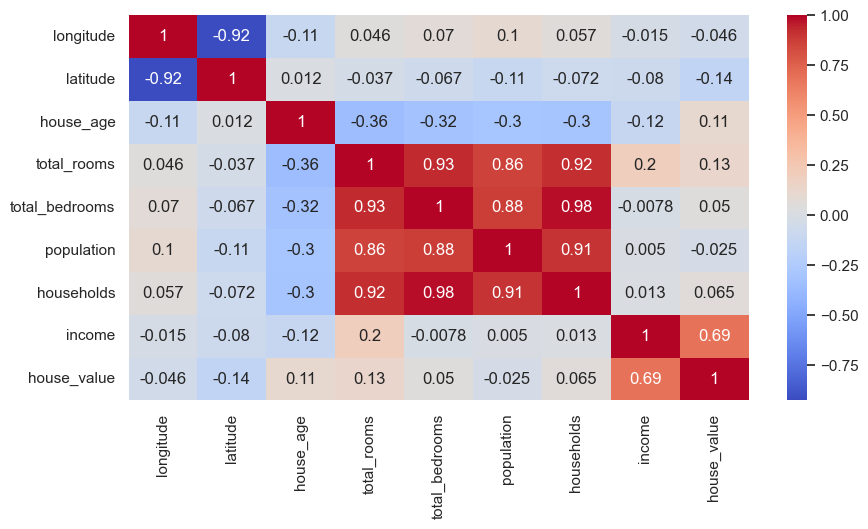

In [27]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

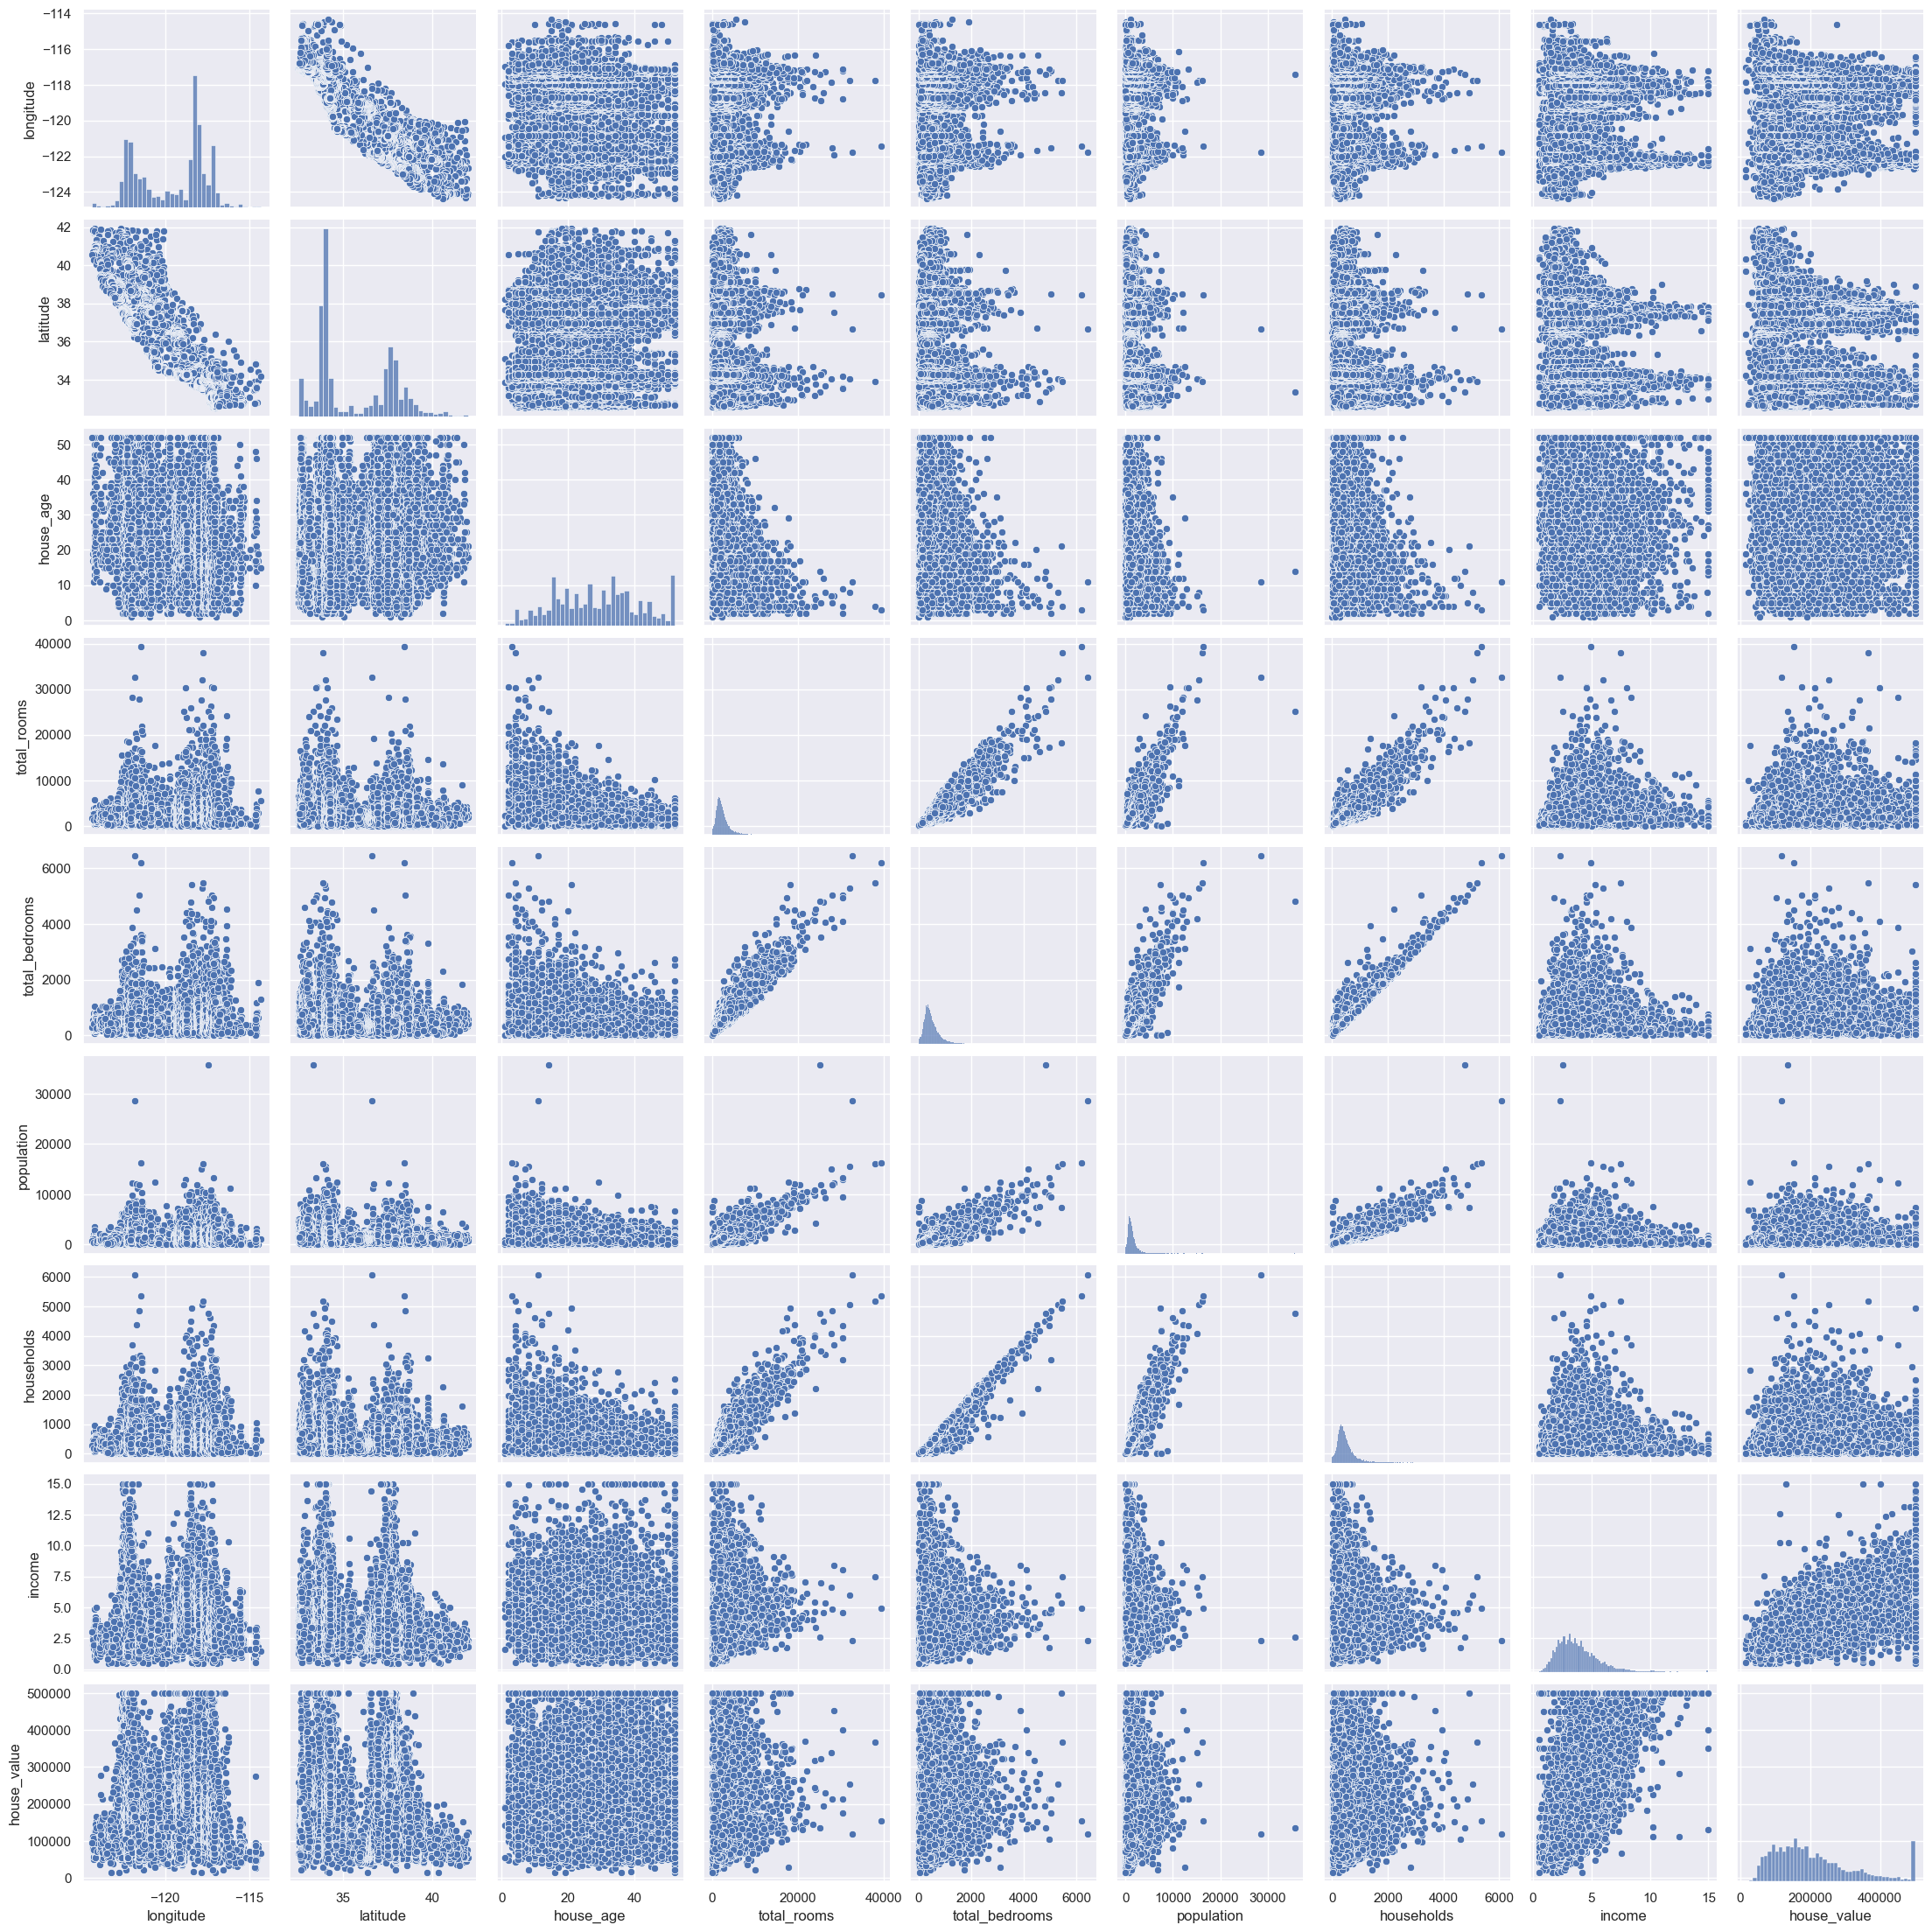

In [28]:
sns.pairplot(df.select_dtypes(['number']))
plt.show()

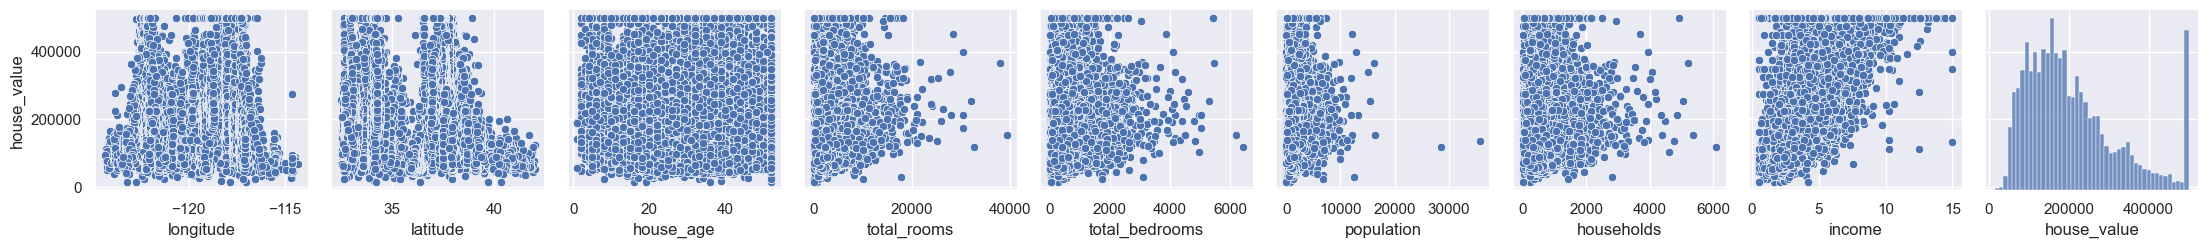

In [176]:
sns.pairplot(df, x_vars=df.columns[:-1], y_vars=['house_value'], kind='scatter')
plt.show()

## Simple Linear Regression

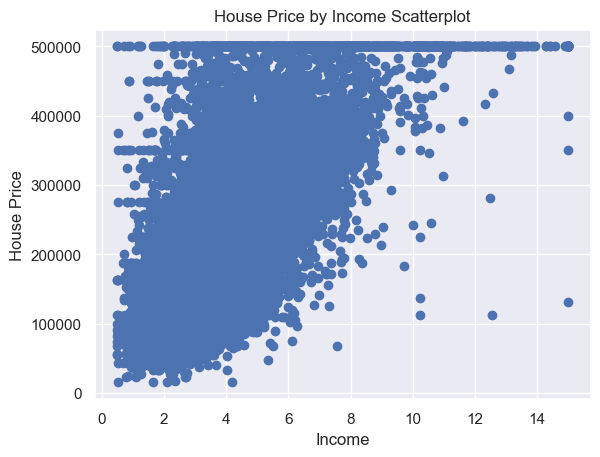

In [29]:
plt.scatter(df['income'],df['house_value'])
plt.xlabel('Income')
plt.ylabel('House Price')
plt.title('House Price by Income Scatterplot')
plt.show()

In [30]:
x1 = df['income']
y = df['house_value']

In [31]:
x = sm.add_constant(x1)
lm = sm.OLS(y,x).fit()

In [32]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            house_value   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                 1.844e+04
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:26:40   Log-Likelihood:            -2.6053e+05
No. Observations:               20428   AIC:                         5.211e+05
Df Residuals:                   20426   BIC:                         5.211e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.478e+04   1328.999     33.695      0.000    4.22e+04    4.74e+04
income      4.186e+04    308.190    135.811      0.000    4.13e+04    4.25e+04
==============================================================================
Omnibus:                     4213.862   Durbin-Watson:                   0.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9238.223
Skew:                           1.193   Prob(JB):                         0.00
Kurtosis:                       5.273   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple Linear Regression

In [33]:
df_dummies = pd.get_dummies(df['ocean_proximity'], prefix='Ocean')
df_dummies.head()

Ocean_<1H OCEAN  Ocean_INLAND  Ocean_NEAR BAY  Ocean_NEAR OCEAN
0                0             0               1                 0
1                0             0               1                 0
2                0             0               1                 0
3                0             0               1                 0
4                0             0               1                 0

In [34]:
df_dumm = pd.concat([df,df_dummies], axis = 1)

In [35]:
df_dumm.head()

longitude  latitude  house_age  total_rooms  total_bedrooms  population  \
0    -122.23     37.88       41.0        880.0           129.0       322.0   
1    -122.22     37.86       21.0       7099.0          1106.0      2401.0   
2    -122.24     37.85       52.0       1467.0           190.0       496.0   
3    -122.25     37.85       52.0       1274.0           235.0       558.0   
4    -122.25     37.85       52.0       1627.0           280.0       565.0   

   households  income  house_value ocean_proximity  Ocean_<1H OCEAN  \
0       126.0  8.3252     452600.0        NEAR BAY                0   
1      1138.0  8.3014     358500.0        NEAR BAY                0   
2       177.0  7.2574     352100.0        NEAR BAY                0   
3       219.0  5.6431     341300.0        NEAR BAY                0   
4       259.0  3.8462     342200.0        NEAR BAY                0   

   Ocean_INLAND  Ocean_NEAR BAY  Ocean_NEAR OCEAN  
0             0               1                 0  
1             0               1                 0  
2             0               1                 0  
3             0               1                 0  
4             0               1                 0

In [36]:
df_dumm.drop('ocean_proximity',axis = 1,inplace = True)

In [37]:
df_dumm.head()

longitude  latitude  house_age  total_rooms  total_bedrooms  population  \
0    -122.23     37.88       41.0        880.0           129.0       322.0   
1    -122.22     37.86       21.0       7099.0          1106.0      2401.0   
2    -122.24     37.85       52.0       1467.0           190.0       496.0   
3    -122.25     37.85       52.0       1274.0           235.0       558.0   
4    -122.25     37.85       52.0       1627.0           280.0       565.0   

   households  income  house_value  Ocean_<1H OCEAN  Ocean_INLAND  \
0       126.0  8.3252     452600.0                0             0   
1      1138.0  8.3014     358500.0                0             0   
2       177.0  7.2574     352100.0                0             0   
3       219.0  5.6431     341300.0                0             0   
4       259.0  3.8462     342200.0                0             0   

   Ocean_NEAR BAY  Ocean_NEAR OCEAN  
0               1                 0  
1               1                 0  
2               1                 0  
3               1                 0  
4               1                 0

In [38]:
x1 = df_dumm.drop('house_value', axis = 1)
y = df_dumm['house_value']

In [39]:
x = sm.add_constant(x1)
lm1 = sm.OLS(y,x).fit()

In [40]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            house_value   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3392.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:26:47   Log-Likelihood:            -2.5648e+05
No. Observations:               20428   AIC:                         5.130e+05
Df Residuals:                   20416   BIC:                         5.131e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.824e+06   7.04e+04    -25.922      0.000   -1.96e+06   -1.69e+06
longitude        -2.681e+04   1019.577    -26.298      0.000   -2.88e+04   -2.48e+04
latitude         -2.548e+04   1004.630    -25.365      0.000   -2.75e+04   -2.35e+04
house_age         1073.0066     43.890     24.448      0.000     986.979    1159.034
total_rooms         -6.1912      0.791     -7.823      0.000      -7.742      -4.640
total_bedrooms     100.5688      6.868     14.642      0.000      87.106     114.032
population         -37.9659      1.076    -35.282      0.000     -40.075     -35.857
households          49.5873      7.451      6.655      0.000      34.982      64.192
income            3.926e+04    337.985    116.164      0.000    3.86e+04    3.99e+04
Ocean_<1H OCEAN  -4.462e+05   1.77e+04    -25.253      0.000   -4.81e+05   -4.12e+05
Ocean_INLAND     -4.855e+05   1.67e+04    -29.152      0.000   -5.18e+05   -4.53e+05
Ocean_NEAR BAY   -4.502e+05   1.81e+04    -24.828      0.000   -4.86e+05   -4.15e+05
Ocean_NEAR OCEAN -4.419e+05    1.8e+04    -24.504      0.000   -4.77e+05   -4.07e+05
==============================================================================
Omnibus:                     5050.842   Durbin-Watson:                   0.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19138.343
Skew:                           1.197   Prob(JB):                         0.00
Kurtosis:                       7.093   Cond. No.                     1.48e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.46e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [41]:
vif_data = pd.DataFrame()
vif_data["house_value"] = x1.columns
vif_data["VIF"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]

In [42]:
print(vif_data)

         house_value           VIF
0          longitude     18.089204
1           latitude     19.963704
2          house_age      1.323391
3        total_rooms     12.965578
4     total_bedrooms     36.312888
5         population      6.445471
6         households     35.173633
7             income      1.786245
8    Ocean_<1H OCEAN  14846.176729
9       Ocean_INLAND  10428.961374
10    Ocean_NEAR BAY   3768.013268
11  Ocean_NEAR OCEAN   4353.440771


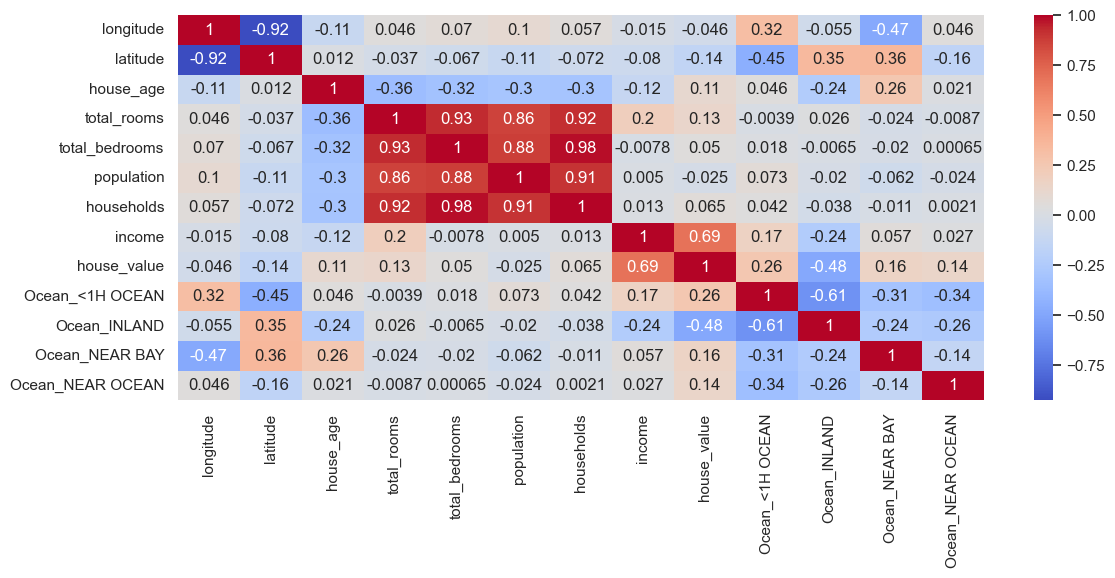

In [43]:
plt.figure(figsize = (13,5))
sns.heatmap(df_dumm.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [44]:
x1.drop(['longitude','total_bedrooms','households','population'], axis =1, inplace = True)

In [45]:
x = sm.add_constant(x1)
lm2 = sm.OLS(y,x).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            house_value   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     4385.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:26:50   Log-Likelihood:            -2.5773e+05
No. Observations:               20428   AIC:                         5.155e+05
Df Residuals:                   20420   BIC:                         5.155e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.344e+04   8634.691      1.557      0.120   -3482.177    3.04e+04
latitude           310.5126    292.897      1.060      0.289    -263.588     884.614
house_age         1145.9527     46.302     24.749      0.000    1055.197    1236.709
total_rooms          3.4441      0.255     13.514      0.000       2.945       3.944
income             3.76e+04    285.389    131.761      0.000     3.7e+04    3.82e+04
Ocean_<1H OCEAN   1.439e+04   1920.610      7.494      0.000    1.06e+04    1.82e+04
Ocean_INLAND     -5.785e+04   2495.995    -23.176      0.000   -6.27e+04    -5.3e+04
Ocean_NEAR BAY    2.524e+04   3045.527      8.287      0.000    1.93e+04    3.12e+04
Ocean_NEAR OCEAN  3.166e+04   2165.559     14.619      0.000    2.74e+04    3.59e+04
==============================================================================
Omnibus:                     4764.935   Durbin-Watson:                   0.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12968.604
Skew:                           1.245   Prob(JB):                         0.00
Kurtosis:                       6.005   Cond. No.                     1.30e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.41e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
vif_data = pd.DataFrame()
vif_data["house_value"] = x1.columns
vif_data["VIF"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
print(vif_data)

        house_value         VIF
0          latitude    1.502515
1         house_age    1.304145
2       total_rooms    1.190460
3            income    1.127672
4   Ocean_<1H OCEAN  183.819498
5      Ocean_INLAND  147.131877
6    Ocean_NEAR BAY   56.181467
7  Ocean_NEAR OCEAN   54.618092


## SciLearn

In [47]:
reg = LinearRegression()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x1,y,test_size = 0.3, random_state = 365)

In [49]:
reg.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred = reg.predict(X_test)

In [51]:
mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
print(f'MSE: {mse}')
print(f'MAE: {mae}')

MSE: 5192276253.245447
MAE: 52784.678937950346


In [52]:
results = pd.DataFrame({'Predicted':np.round(y_pred),'Actual':y_test,'Abs.Difference':np.abs(y_pred-y_test)})
results

Predicted    Actual  Abs.Difference
3788    179759.0  184400.0     4640.787360
10115   309764.0  245000.0    64763.747190
4831    155671.0  170300.0    14629.068964
13802   186943.0  176900.0    10042.792542
6075    302482.0  267200.0    35281.869552
...          ...       ...             ...
12724   196062.0  194100.0     1961.610601
19797    75976.0   49600.0    26376.319269
20122   117004.0  156300.0    39296.303695
2831     74481.0   59400.0    15080.860631
17160   477523.0  500001.0    22478.469728

[6129 rows x 3 columns]

In [53]:
results['Abs.Difference'].describe()

count      6129.000000
mean      52784.678938
std       49055.545614
min          23.948188
25%       18394.873136
50%       39885.089436
75%       70754.983597
max      379890.228933
Name: Abs.Difference, dtype: float64

<Axes: xlabel='Abs.Difference', ylabel='Density'>

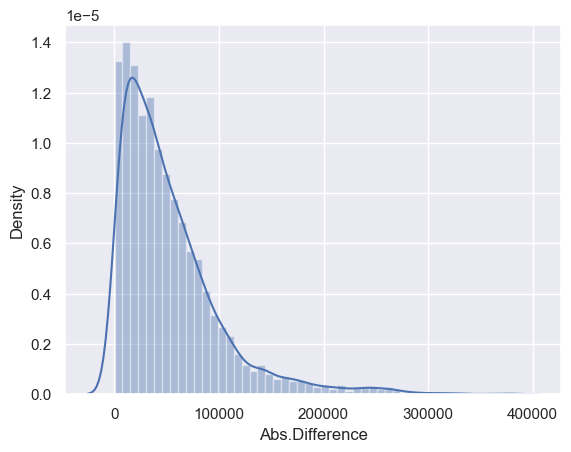

In [54]:
sns.distplot(results['Abs.Difference'])

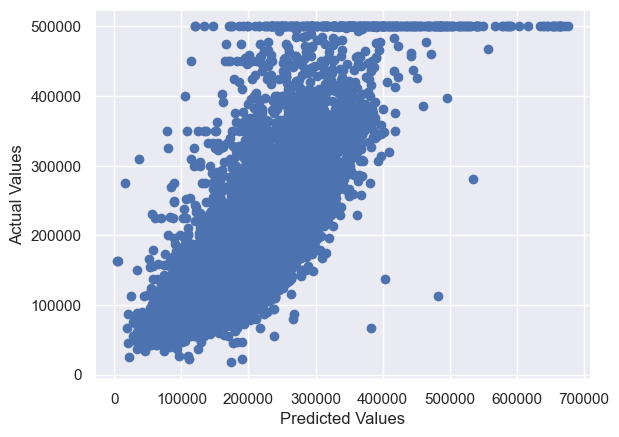

In [56]:
plt.scatter(y_pred,y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## Ridge Regression

In [57]:
df_dumm.head()

longitude  latitude  house_age  total_rooms  total_bedrooms  population  \
0    -122.23     37.88       41.0        880.0           129.0       322.0   
1    -122.22     37.86       21.0       7099.0          1106.0      2401.0   
2    -122.24     37.85       52.0       1467.0           190.0       496.0   
3    -122.25     37.85       52.0       1274.0           235.0       558.0   
4    -122.25     37.85       52.0       1627.0           280.0       565.0   

   households  income  house_value  Ocean_<1H OCEAN  Ocean_INLAND  \
0       126.0  8.3252     452600.0                0             0   
1      1138.0  8.3014     358500.0                0             0   
2       177.0  7.2574     352100.0                0             0   
3       219.0  5.6431     341300.0                0             0   
4       259.0  3.8462     342200.0                0             0   

   Ocean_NEAR BAY  Ocean_NEAR OCEAN  
0               1                 0  
1               1                 0  
2               1                 0  
3               1                 0  
4               1                 0

In [58]:
X = df_dumm.drop('house_value', axis = 1)
y = df_dumm['house_value']

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.35, random_state = 365)

In [60]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
cv = RepeatedKFold(n_splits = 5,n_repeats = 3,random_state = 1)

In [62]:
ridge = RidgeCV(alphas = np.arange(0.1,10,0.1),cv = cv,scoring = 'neg_mean_squared_error')
ridge.fit(X_train,y_train)
ridge_reg_y_pred = ridge.predict(X_test)

print('Ridge Tuning Parameter: ',(ridge.alpha_))
print('Ridge Model Coefficients: ',(ridge.coef_))
print('Ridge Model Intercept: ',(ridge.intercept_))

Ridge Tuning Parameter:  9.9
Ridge Model Coefficients:  [-53033.40882235 -53637.19433563  13240.09306282 -15721.79777826
  43274.19039075 -40108.09788271  17021.32566029  74356.89590986
   6351.86393628 -12715.68395163   3046.78733754   5501.06162916]
Ridge Model Intercept:  207338.84734146704


In [63]:
print('Ridge Regression Model RMSE is :',np.sqrt(mean_squared_error(y_test,ridge_reg_y_pred)))
print('Ridge Regression Model Training Score: ',ridge.score(X_train,y_train))
print('Ridge Regression Model Testing Score: ',ridge.score(X_test,y_test))
print('Ridge Regression Model MAE is :',mean_absolute_error(y_test,ridge_reg_y_pred))
print('Ridge Regression Model MSE is :',mean_squared_error(y_test,ridge_reg_y_pred))


Ridge Regression Model RMSE is : 67104.89687042584
Ridge Regression Model Training Score:  0.6404701896593159
Ridge Regression Model Testing Score:  0.6569695353366418
Ridge Regression Model MAE is : 49034.85541172944
Ridge Regression Model MSE is : 4503067183.990488


## Lasso Regression 

In [64]:
cv = RepeatedKFold(n_splits = 5,n_repeats = 3,random_state = 5)

In [65]:
lasso = LassoCV(alphas = np.arange(0.1,10,0.1),cv = cv)
lasso.fit(X_train,y_train)
lasso_reg_y_pred = ridge.predict(X_test)

print('Lasso Tuning Parameter: ',(lasso.alpha_))
print('Lasso Model Coefficients: ',(lasso.coef_))
print('Lasso Model Intercept: ',(lasso.intercept_))

Lasso Tuning Parameter:  9.9
Lasso Model Coefficients:  [-54149.59214776 -54808.02708323  13221.88068999 -16007.9285626
  44219.13312088 -40162.6132806   16392.06266812  74444.10808504
   1559.5551209  -16882.13264202     -0.           2240.83162098]
Lasso Model Intercept:  207338.84734146704


In [66]:
print('Lasso Regression Model RMSE is :',np.sqrt(mean_squared_error(y_test,lasso_reg_y_pred)))
print('Lasso Regression Model Training Score: ',lasso.score(X_train,y_train))
print('Lasso Regression Model Testing Score: ',lasso.score(X_test,y_test))
print('Lasso Regression Model MAE is :',mean_absolute_error(y_test,lasso_reg_y_pred))
print('Lasso Regression Model MSE is :',mean_squared_error(y_test,lasso_reg_y_pred))


Lasso Regression Model RMSE is : 67104.89687042584
Lasso Regression Model Training Score:  0.6404809722729181
Lasso Regression Model Testing Score:  0.6569625620133052
Lasso Regression Model MAE is : 49034.85541172944
Lasso Regression Model MSE is : 4503067183.990488


### Removing the Leverage Points

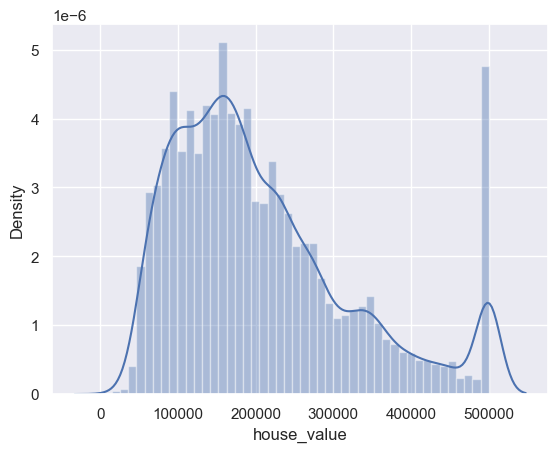

In [67]:
sns.distplot(df_dumm['house_value'])
plt.show()

In [68]:
q4 = df_dumm['house_value'].quantile(0.75)

In [69]:
new_df = df_dumm[df_dumm['house_value'] < q4]

In [70]:
new_df.shape

(15318, 13)

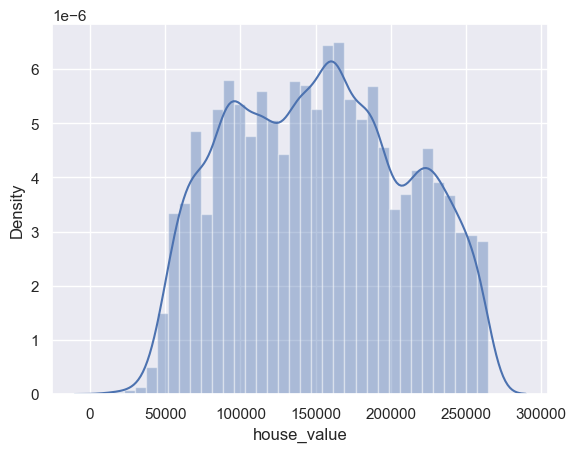

In [71]:
sns.distplot(new_df['house_value'])
plt.show()

In [72]:
new_df.head()

longitude  latitude  house_age  total_rooms  total_bedrooms  population  \
7     -122.25     37.84       52.0       3104.0           687.0      1157.0   
8     -122.26     37.84       42.0       2555.0           665.0      1206.0   
9     -122.25     37.84       52.0       3549.0           707.0      1551.0   
11    -122.26     37.85       52.0       3503.0           752.0      1504.0   
12    -122.26     37.85       52.0       2491.0           474.0      1098.0   

    households  income  house_value  Ocean_<1H OCEAN  Ocean_INLAND  \
7        647.0  3.1200     241400.0                0             0   
8        595.0  2.0804     226700.0                0             0   
9        714.0  3.6912     261100.0                0             0   
11       734.0  3.2705     241800.0                0             0   
12       468.0  3.0750     213500.0                0             0   

    Ocean_NEAR BAY  Ocean_NEAR OCEAN  
7                1                 0  
8                1                 0  
9                1                 0  
11               1                 0  
12               1                 0

In [73]:
x5 = new_df.drop('house_value', axis = 1)
y = new_df['house_value']

In [74]:
x = sm.add_constant(x5)
lm_new = sm.OLS(y,x).fit()
lm_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            house_value   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     1933.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:28:09   Log-Likelihood:            -1.8296e+05
No. Observations:               15318   AIC:                         3.659e+05
Df Residuals:                   15306   BIC:                         3.660e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9.268e+05   4.23e+04    -21.913      0.000   -1.01e+06   -8.44e+05
longitude        -1.398e+04    607.159    -23.024      0.000   -1.52e+04   -1.28e+04
latitude         -1.256e+04    584.875    -21.481      0.000   -1.37e+04   -1.14e+04
house_age          154.2270     28.801      5.355      0.000      97.773     210.680
total_rooms         -4.4996      0.563     -7.994      0.000      -5.603      -3.396
total_bedrooms      51.6183      4.321     11.946      0.000      43.149      60.088
population         -12.3325      0.654    -18.850      0.000     -13.615     -11.050
households          15.8824      4.439      3.578      0.000       7.181      24.584
income             2.48e+04    315.583     78.582      0.000    2.42e+04    2.54e+04
Ocean_<1H OCEAN  -2.158e+05   1.06e+04    -20.333      0.000   -2.37e+05   -1.95e+05
Ocean_INLAND     -2.571e+05      1e+04    -25.599      0.000   -2.77e+05   -2.37e+05
Ocean_NEAR BAY   -2.296e+05   1.09e+04    -20.989      0.000   -2.51e+05   -2.08e+05
Ocean_NEAR OCEAN -2.243e+05   1.08e+04    -20.772      0.000   -2.45e+05   -2.03e+05
==============================================================================
Omnibus:                      599.788   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1148.678
Skew:                           0.299   Prob(JB):                    3.70e-250
Kurtosis:                       4.201   Cond. No.                     3.06e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.38e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Ridge Regression in the new dataset

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x5,y,test_size = 0.3, random_state = 365)

In [76]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
cv = RepeatedKFold(n_splits = 5)

In [78]:
ridge = RidgeCV(alphas = np.arange(0.1,10,0.1),cv = cv,scoring = 'neg_mean_squared_error')
ridge.fit(X_train,y_train)
ridge_reg_y_pred = ridge.predict(X_test)

print('Ridge Tuning Parameter: ',(ridge.alpha_))
print('Ridge Model Coefficients: ',(ridge.coef_))
print('Ridge Model Intercept: ',(ridge.intercept_))

Ridge Tuning Parameter:  5.3
Ridge Model Coefficients:  [-27787.77452391 -28189.88166474   1633.68622623 -10881.16604053
  21555.82048313 -15614.77641468   8611.32880013  30573.69831879
   8761.80127075 -11281.63375696   1062.44531345   3046.47555363]
Ridge Model Intercept:  151183.34238015302


In [79]:
print('Ridge Regression Model RMSE is :',np.sqrt(mean_squared_error(y_test,ridge_reg_y_pred)))
print('Ridge Regression Model Training Score: ',ridge.score(X_train,y_train))
print('Ridge Regression Model Testing Score: ',ridge.score(X_test,y_test))
print('Ridge Regression Model MAE is :',mean_absolute_error(y_test,ridge_reg_y_pred))
print('Ridge Regression Model MSE is :',mean_squared_error(y_test,ridge_reg_y_pred))

Ridge Regression Model RMSE is : 37500.52622711392
Ridge Regression Model Training Score:  0.5819999941821286
Ridge Regression Model Testing Score:  0.5789159463913385
Ridge Regression Model MAE is : 29269.885236709077
Ridge Regression Model MSE is : 1406289467.310459


## Random Forests

In [80]:
df_dumm.head()

longitude  latitude  house_age  total_rooms  total_bedrooms  population  \
0    -122.23     37.88       41.0        880.0           129.0       322.0   
1    -122.22     37.86       21.0       7099.0          1106.0      2401.0   
2    -122.24     37.85       52.0       1467.0           190.0       496.0   
3    -122.25     37.85       52.0       1274.0           235.0       558.0   
4    -122.25     37.85       52.0       1627.0           280.0       565.0   

   households  income  house_value  Ocean_<1H OCEAN  Ocean_INLAND  \
0       126.0  8.3252     452600.0                0             0   
1      1138.0  8.3014     358500.0                0             0   
2       177.0  7.2574     352100.0                0             0   
3       219.0  5.6431     341300.0                0             0   
4       259.0  3.8462     342200.0                0             0   

   Ocean_NEAR BAY  Ocean_NEAR OCEAN  
0               1                 0  
1               1                 0  
2               1                 0  
3               1                 0  
4               1                 0

In [81]:
X = df_dumm.drop('house_value', axis = 1)
y = df_dumm['house_value']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 365)

In [83]:
reg = RandomForestRegressor()

In [ ]:
reg.fit(X_train,y_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')